In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
df1= df.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
df1.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18b0a49f880>,
 'caps': [<matplotlib.lines.Line2D at 0x18b0a5a6340>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b0a3e69a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18b0a322d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b0a3826a0>],
 'means': []}

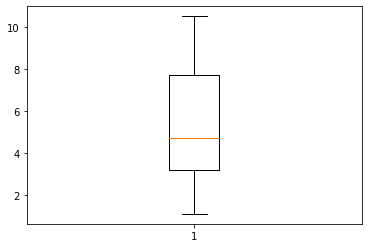

In [20]:
plt.boxplot(df1.YE)

{'whiskers': [<matplotlib.lines.Line2D at 0x18b0a5e8a00>,
 'caps': [<matplotlib.lines.Line2D at 0x18b0a5df3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b0a5e86a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18b0a5f6610>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b0a5eed30>],
 'means': []}

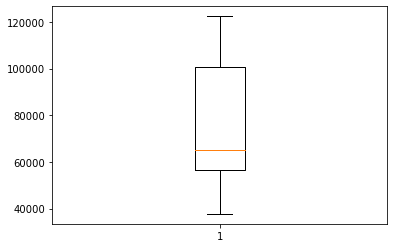

In [21]:
plt.boxplot(df1.Sal)

In [22]:
df1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


(array([3., 2., 1., 6., 3., 2., 0., 1., 1., 2., 1., 1., 2., 2., 3.]),
 array([ 37731.,  43375.,  49019.,  54663.,  60307.,  65951.,  71595.,
         77239.,  82883.,  88527.,  94171.,  99815., 105459., 111103.,
        116747., 122391.]),
 <a list of 15 Patch objects>)

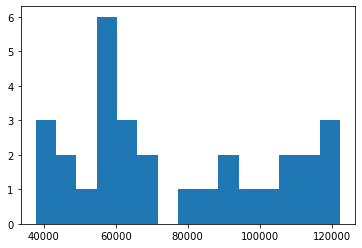

In [26]:
plt.hist(df1.Sal, bins=15)

Text(0, 0.5, 'Salary hike')

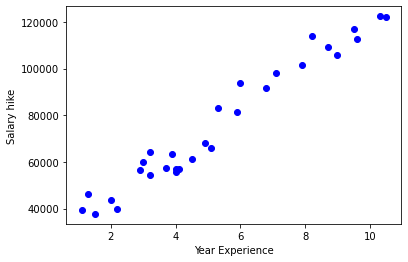

In [31]:
plt.scatter(x=df1.YE,y=df1.Sal,color='Blue')
plt.xlabel("Year Experience")
plt.ylabel("Salary hike")


In [71]:
model1= smf.ols('Sal~YE', data=df1).fit()

In [72]:
print(model1.tvalues,model1.pvalues)

Intercept    11.346940
YE           24.950094
dtype: float64 Intercept    5.511950e-12
YE           1.143068e-20
dtype: float64


In [73]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        14:07:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model2=smf.ols('Sal~np.log(YE)', data=df1).fit()

In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           3.25e-13
Time:                        13:43:32   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model3= smf.ols('Sal~np.exp(YE)', data=df1).fit()

In [54]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           2.72e-05
Time:                        13:44:30   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YE)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [47]:
model2.params

Intercept     14927.97177
np.log(YE)    40581.98796
dtype: float64

In [55]:
model3.params

Intercept     67568.624969
np.exp(YE)        2.136040
dtype: float64

In [56]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YE,8674.118747,10225.805896


In [58]:
pred_sal= model.predict(df1)

Text(0, 0.5, 'Salary')

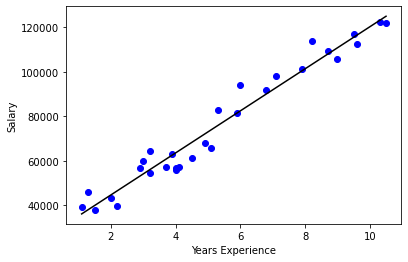

In [66]:
plt.scatter(x=df1.YE,y=df1.Sal, color="blue")
plt.plot(df1.YE, pred_sal,color='black')
plt.xlabel("Years Experience")
plt.ylabel("Salary")

In [65]:
pred2=model2.predict(df1)

Text(0, 0.5, 'Salary')

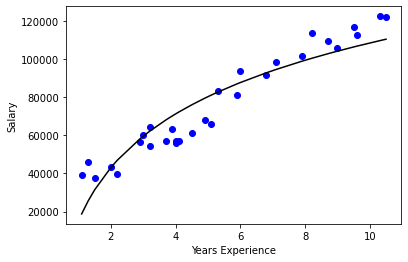

In [69]:
plt.scatter(x=df1.YE, y=df1.Sal, color='blue')
plt.plot(df1.YE, pred2,color='black')
plt.xlabel("Years Experience")
plt.ylabel("Salary")

In [70]:
Model1 is better than Model2

SyntaxError: invalid syntax (<ipython-input-70-01a864ba9aa5>, line 1)